In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.dates import AutoDateLocator, DateFormatter, HOURLY
import numpy as np
from pathlib import Path

In [2]:
data_path = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/uno_pi_cc_hnorm_unit_aug/test_good/12673/real_time.csv"
result_path = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/uno_pi_cc_hnorm_unit_aug/test_good/12673"

In [3]:
data_path = Path(data_path)
result_path = Path(result_path)

In [4]:
df = pd.read_csv(data_path)

In [5]:
dV = (df['dV_1e23'].iloc[0]*1e-10)
dV

1.9916740609361494e-10

In [6]:
energy_factor = dV/(8*np.pi)
energy_factor

7.924619295647423e-12

In [7]:
df['pred_E_unit'].iloc[0] * energy_factor

1.082556333106325

In [8]:
df['pred_E_1e33'].iloc[0]

1.082556333106325

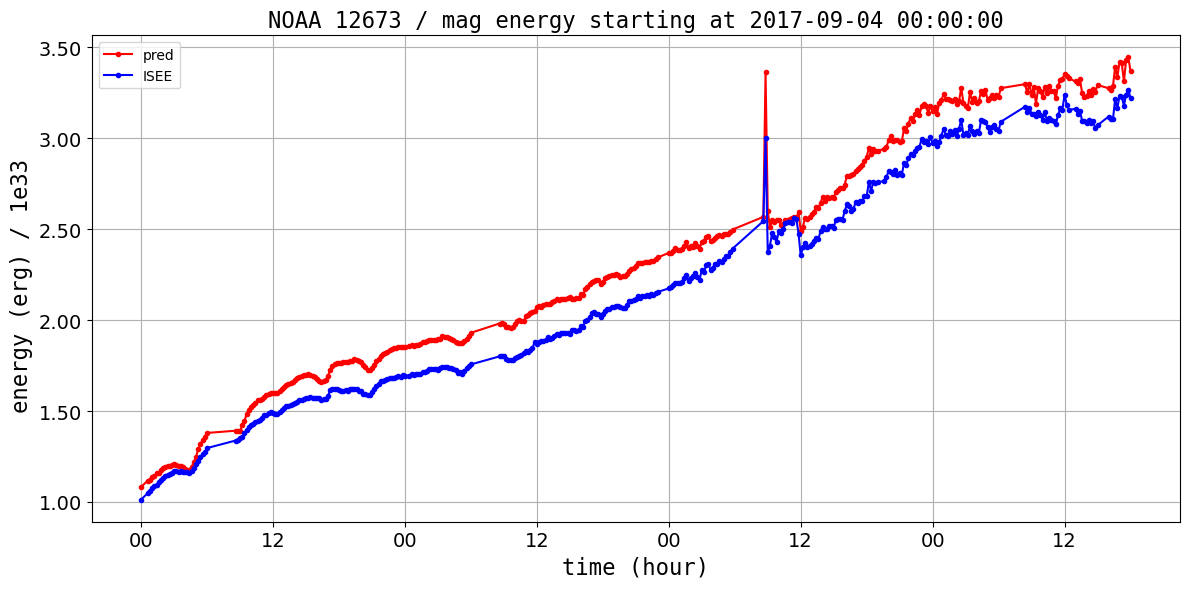

In [10]:
title = "NOAA 12673"
ylim = None
hour = 3

obstime = df['obstime']
pred_E = df['pred_E_1e33']
ref_E = df['ref_E_1e33']

obstime = pd.to_datetime(obstime).to_list()
pred_E = pred_E.to_list()
ref_E = ref_E.to_list()

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='pred')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='ISEE')

# format the x-axis with universal time
locator = AutoDateLocator()
# locator.intervald[HOURLY] = [hour] # only show every 3 hours
formatter = DateFormatter('%H')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('energy (erg) / 1e33 ',**text_style)
ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'energy.png', dpi=600)

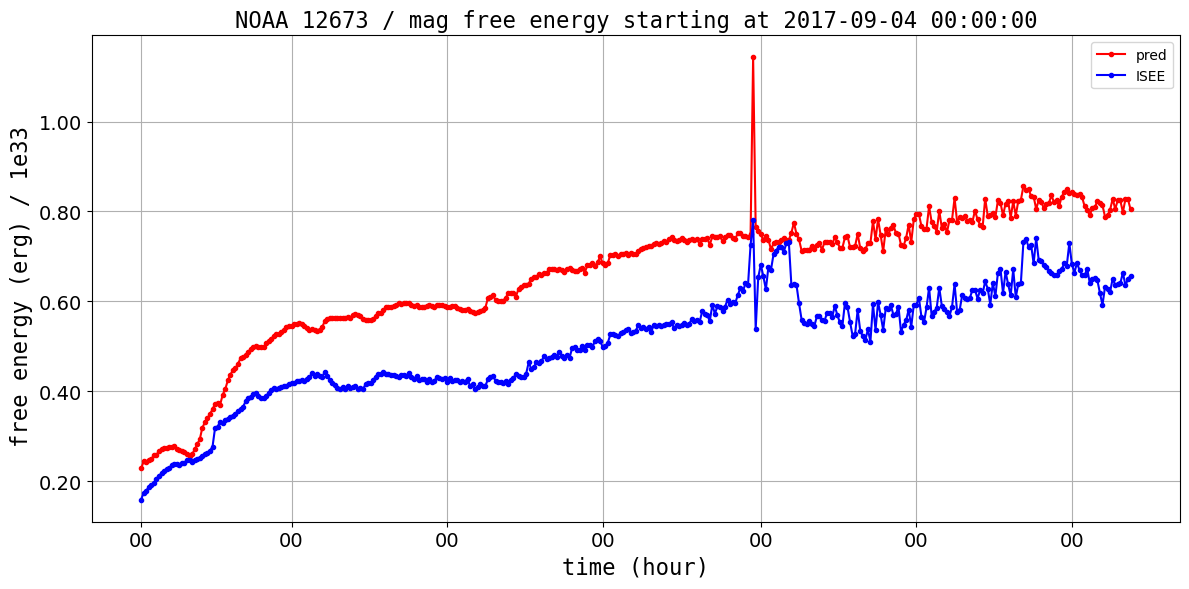

In [11]:
title = "NOAA 12673"
ylim = None
hour = 3

obstime = df['obstime']
pot_E = df['pot_E_1e33']
pred_free_E = df['pred_E_1e33'] - pot_E
ref_free_E = df['ref_E_1e33'] - pot_E

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_free_E,'o', **marker_style, color='red', label='pred')
ax.plot(obstime, ref_free_E,'o', **marker_style, color='blue', label='ISEE')

# format the x-axis with universal time
locator = AutoDateLocator()
locator.intervald[HOURLY] = [hour] # only show every 3 hours
formatter = DateFormatter('%H')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('free energy (erg) / 1e33 ',**text_style)
ax.set_title(f'{title} / mag free energy starting at {str(obstime.iloc[0])}',**text_style)
ax.set_ylim(ylim)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'free_energy.png', dpi=600)